In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
%matplotlib inline

from ann import ANN

In [2]:
n_samples = 100
X, y = make_moons(n_samples=n_samples, noise=0.25)
y = y[:,np.newaxis]

In [3]:
X, y = X.astype('float32'), y.astype('float32')
X.shape, y.shape

((100, 2), (100, 1))

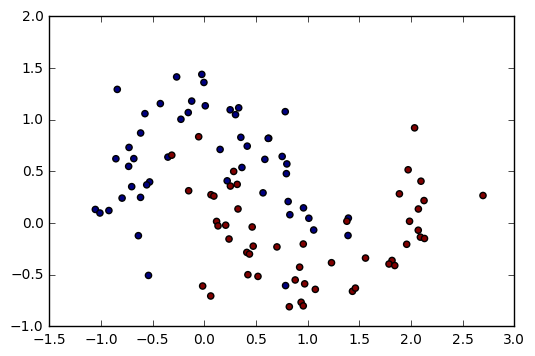

In [4]:
plt.scatter(X[:,0], X[:,1], c = y[:,0])

In [5]:
ann = ANN(2, 1, [50,50], activation=tf.nn.sigmoid, bayesian=True, lrep=True, nsamples=1)

In [6]:
x_ = tf.placeholder_with_default(X, shape=[None,2])
y_ = tf.placeholder_with_default(y, shape=[None,1])

In [7]:
y_pred = ann(x_)

In [8]:
#y_pred = y_pred[0]
#ann.logits = ann.logits[0]

In [9]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=ann.logits)) + ann.loss/n_samples

In [10]:
tf.summary.scalar('ELBO', loss)

<tf.Tensor 'ELBO:0' shape=() dtype=string>

In [11]:
train_op = tf.train.AdamOptimizer().minimize(loss)

In [12]:
sess = tf.InteractiveSession()

In [13]:
tf.global_variables_initializer().run()

In [14]:
sum_merge = tf.summary.merge_all()

In [15]:
!rm -R /tmp/lrep/

In [16]:
writer = tf.summary.FileWriter('/tmp/lrep')

In [ ]:
writer.add_graph(tf.get_default_graph())

In [ ]:
for i in range(100000):
    summary, _ = sess.run([sum_merge, train_op])
    
    if i % 1000 == 0:
        writer.add_summary(summary, global_step=i)